imports

In [2]:
script_root_dir = '../../'
import sys
if script_root_dir not in sys.path:
    sys.path.append(script_root_dir)


import train.dataLoader as dataLoader
from train.configParser import ConfigParser

params

In [3]:
# defining global variables
experimentName = "/home/elhamod/melhamodenv3/BGNN/testTrainingScript3"

params = next(ConfigParser(experimentName).getExperiments())
print(params)

{'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 32, 'n_epochs': 5000, 'learning_rate': 0.01, 'numOfTrials': 3, 'patience': 100, 'fc_width': 200, 'fc_layers': 1, 'modelType': 'blackbox', 'lambda': 0, 'unsupervisedOnTest': False, 'tl_model': 'ResNet18'}


pre-defined strings

In [3]:
cleaned_species_csv_fileName = "cleaned_metadata.csv"
species_csv_fileName_header = "fileName"
species_csv_scientificName_header = "scientificName"
species_csv_Genus_header = "Genus"
species_csv_Family_header = "Family"
image_subpath = "images"
species_csv_usedColumns = [species_csv_fileName_header,
                          species_csv_scientificName_header,
                          species_csv_Genus_header,
                          species_csv_Family_header]

Create dataset

In [4]:
datasetManager = dataLoader.datasetManager(experimentName)
datasetManager.updateParams(params)
dataset = datasetManager.getDataset()

Creating dataset...
Creating dataset... Done.


try to reload dataset

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset = datasetManager.getDataset()
speciesList = dataset.csv_processor.getSpeciesList()
numberOfSpecies = len(speciesList)
print("Number of species = ", numberOfSpecies)
genusList = dataset.csv_processor.getGenusList()
numberOfGenus = len(genusList)
print("Number of species = ", numberOfGenus)

Number of species =  11
Number of species =  5


Show an example with and without normalization

Transfrom images...

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

100% (550 of 550) |######################| Elapsed Time: 0:00:39 Time:  0:00:39
  0% (5 of 550) |                        | Elapsed Time: 0:00:00 ETA:   0:00:14

Transfrom images...


100% (550 of 550) |######################| Elapsed Time: 0:00:12 Time:  0:00:12
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


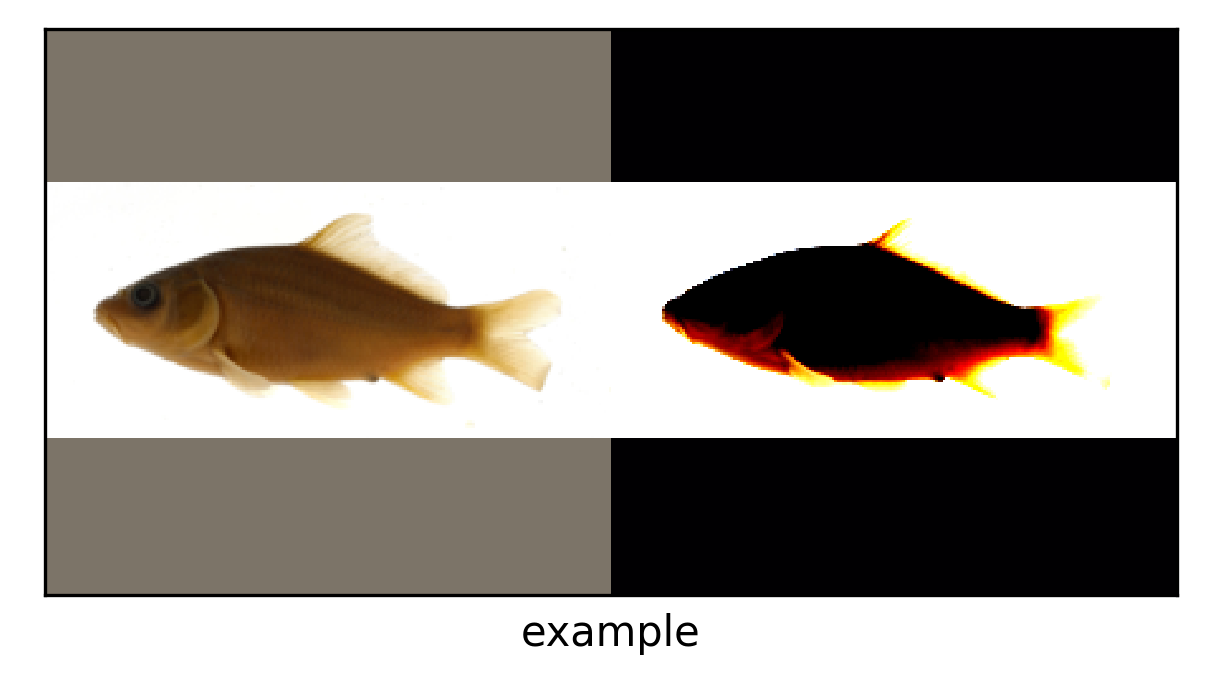

In [6]:
# parameter
example_index = 10

import torch

fig, axes = plt.subplots(1, 1, figsize=(15, 2.5), dpi= 300)
axes.set_xlabel("example")
augmentation, normalization = dataset.toggle_image_loading(augmentation=False, normalization=False)
speciesExample = dataset[example_index]['image'].squeeze()
dataset.toggle_image_loading(augmentation, normalization)
augmentation, normalization = dataset.toggle_image_loading(augmentation=False, normalization=True)
speciesExample2 = dataset[example_index]['image'].squeeze()
dataset.toggle_image_loading(augmentation, normalization)

stitchedImage = torch.cat((speciesExample, speciesExample2), 2)
stitchedImage = stitchedImage.permute(1, 2, 0)

axes.set_xticks([])
axes.set_yticks([])
axes.imshow(stitchedImage.cpu().detach().numpy())


Data Loader

In [7]:
train_loader, validation_loader, test_loader = datasetManager.getLoaders()

trainingFileNames = []
valFileNames = []
testFileNames = []

for batch in train_loader:
    print(batch['species'])
    print(batch['fileName'])

train/test =  440 110
train/val =  352 88
Couldn't write pickle /home/elhamod/melhamodenv3/BGNN/testTrainingScript3/-0x5429b2a9c2c674b3/trainingIndex.pkl
Couldn't write pickle /home/elhamod/melhamodenv3/BGNN/testTrainingScript3/-0x5429b2a9c2c674b3/valIndex.pkl
Couldn't write pickle /home/elhamod/melhamodenv3/BGNN/testTrainingScript3/-0x5429b2a9c2c674b3/testIndex.pkl
Creating loaders...
Creating loaders... Done.
tensor([10,  7,  8,  8,  3,  6,  8,  2,  6,  4,  6,  5,  8,  4,  1,  0,  1,  1,
         3,  0,  5,  3,  9,  7,  2, 10, 10,  3, 10,  8,  3,  5])
['INHS_FISH_46363.jpg', 'INHS_FISH_31009.jpg', 'INHS_FISH_44694.jpg', 'INHS_FISH_27267.jpg', 'INHS_FISH_48520.jpg', 'INHS_FISH_63061.jpg', 'INHS_FISH_74076.jpg', 'INHS_FISH_15451.jpg', 'INHS_FISH_94583.jpg', 'INHS_FISH_63307.jpg', 'INHS_FISH_41171.jpg', 'INHS_FISH_4297.jpg', 'INHS_FISH_51439.jpg', 'INHS_FISH_51703.jpg', 'INHS_FISH_11083.jpg', 'INHS_FISH_29399.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_2257.jpg', 'INHS_FISH_758.jpg', 'INHS_

In [8]:
for batch in validation_loader:
    print(batch['species'])
    print(batch['fileName'])

tensor([ 6, 10,  8,  7,  7,  1,  4,  6,  8,  0,  5,  5,  2,  8,  2,  3,  9,  6,
        10,  5, 10,  8,  5,  4,  5,  9,  0,  1,  0,  4,  6,  1])
['INHS_FISH_45040.jpg', 'INHS_FISH_47006.jpg', 'INHS_FISH_29741.jpg', 'INHS_FISH_53052.jpg', 'INHS_FISH_23032.jpg', 'INHS_FISH_82719.jpg', 'INHS_FISH_61785.jpg', 'INHS_FISH_46194.jpg', 'INHS_FISH_88177.jpg', 'INHS_FISH_93450.jpg', 'INHS_FISH_99106.jpg', 'INHS_FISH_91037.jpg', 'INHS_FISH_39616.jpg', 'INHS_FISH_29618.jpg', 'INHS_FISH_46191.jpg', 'INHS_FISH_23133.jpg', 'INHS_FISH_18547.jpg', 'INHS_FISH_50076.jpg', 'INHS_FISH_84617.jpg', 'INHS_FISH_92074.jpg', 'INHS_FISH_86437.jpg', 'INHS_FISH_31003.jpg', 'INHS_FISH_26337.jpg', 'INHS_FISH_9117.jpg', 'INHS_FISH_92572.jpg', 'INHS_FISH_94860.jpg', 'INHS_FISH_33737.jpg', 'INHS_FISH_96007.jpg', 'INHS_FISH_026162.jpg', 'INHS_FISH_2510.jpg', 'INHS_FISH_62927.jpg', 'INHS_FISH_79838.jpg']
tensor([ 2,  7,  4,  2,  3,  3,  6,  3,  6,  9,  5,  9,  2,  7,  7,  6,  0,  5,
         2,  8, 10,  1,  1,  0,  7, 10,

In [9]:
for batch in test_loader:
    print(batch['species'])
    print(batch['fileName'])

tensor([ 2,  8,  8,  9,  7, 10,  6,  0,  1,  5,  5,  6,  7,  3,  6,  9,  6,  9,
         1,  3,  9,  4,  2, 10,  5,  0, 10,  9,  2,  5,  3,  6])
['INHS_FISH_106678.jpg', 'INHS_FISH_82012.jpg', 'INHS_FISH_29604.jpg', 'INHS_FISH_21565.jpg', 'INHS_FISH_98057.jpg', 'INHS_FISH_103344.jpg', 'INHS_FISH_46991.jpg', 'INHS_FISH_3572.jpg', 'INHS_FISH_50729.jpg', 'INHS_FISH_4325.jpg', 'INHS_FISH_3731.jpg', 'INHS_FISH_47068.jpg', 'INHS_FISH_63287.jpg', 'INHS_FISH_026052.jpg', 'INHS_FISH_59564.jpg', 'INHS_FISH_59719.jpg', 'INHS_FISH_47027.jpg', 'INHS_FISH_64705.jpg', 'INHS_FISH_6228.jpg', 'INHS_FISH_25087.jpg', 'INHS_FISH_87503.jpg', 'INHS_FISH_26594.jpg', 'INHS_FISH_9169.jpg', 'INHS_FISH_89702.jpg', 'INHS_FISH_91796.jpg', 'INHS_FISH_97141.jpg', 'INHS_FISH_62271.jpg', 'INHS_FISH_40526.jpg', 'INHS_FISH_25303.jpg', 'INHS_FISH_48411.jpg', 'INHS_FISH_90518.jpg', 'INHS_FISH_59400.jpg']
tensor([ 4,  5,  7,  7,  0,  7,  4,  1,  1,  1,  9,  7,  1,  6,  6,  0,  8,  5,
         2,  8,  9,  2,  2,  3,  0,  4, 

Plot information about the dataset

        scientificName  count
0    Carassius auratus     50
1      Cyprinus carpio     50
2      Esox americanus     50
3          Esox lucius     50
4      Lepomis auritus     50
5    Lepomis cyanellus     50
6   Noturus eleutherus     50
7       Noturus exilis     50
8       Noturus flavus     50
9      Noturus gyrinus     50
10    Noturus insignis     50


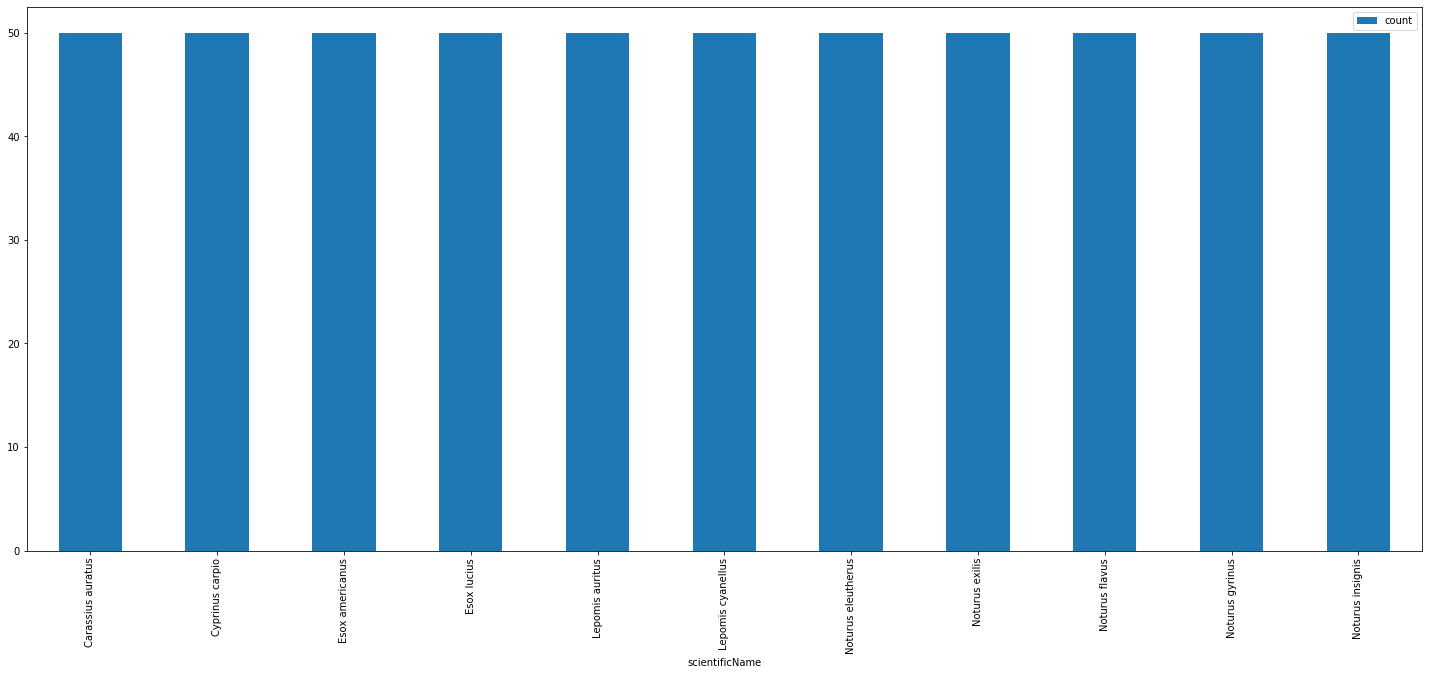

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

suffix = str(params["suffix"]) if ("suffix" in params and params["suffix"] is not None) else ""

full_path = os.path.join(params["image_path"], suffix, "count_per_species.csv")
species_count_table = pd.read_csv(full_path).rename(columns={species_csv_fileName_header: "count"})
print(species_count_table)
species_count_table.plot.bar(x=species_csv_scientificName_header, y='count', rot=90, figsize=(25, 10))
plt.savefig(os.path.join(params["image_path"], suffix, "count_per_species.pdf"))

          Family      Genus  count
1     Cyprinidae  Carassius     50
2     Cyprinidae   Cyprinus     50
0  Centrarchidae    Lepomis    100
3       Esocidae       Esox    100
4    Ictaluridae    Noturus    250
               count
Family              
Centrarchidae    100
Cyprinidae       100
Esocidae         100
Ictaluridae      250


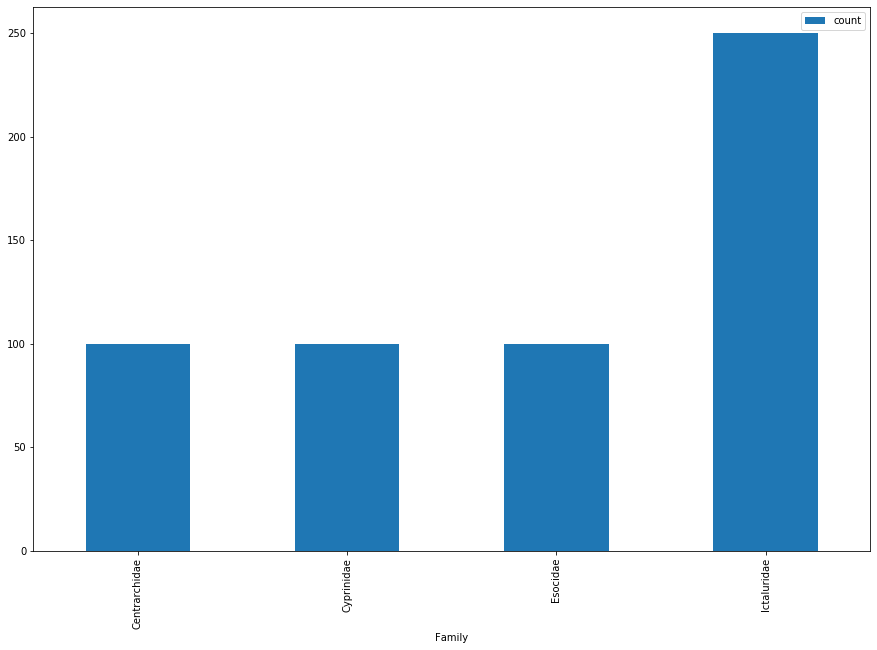

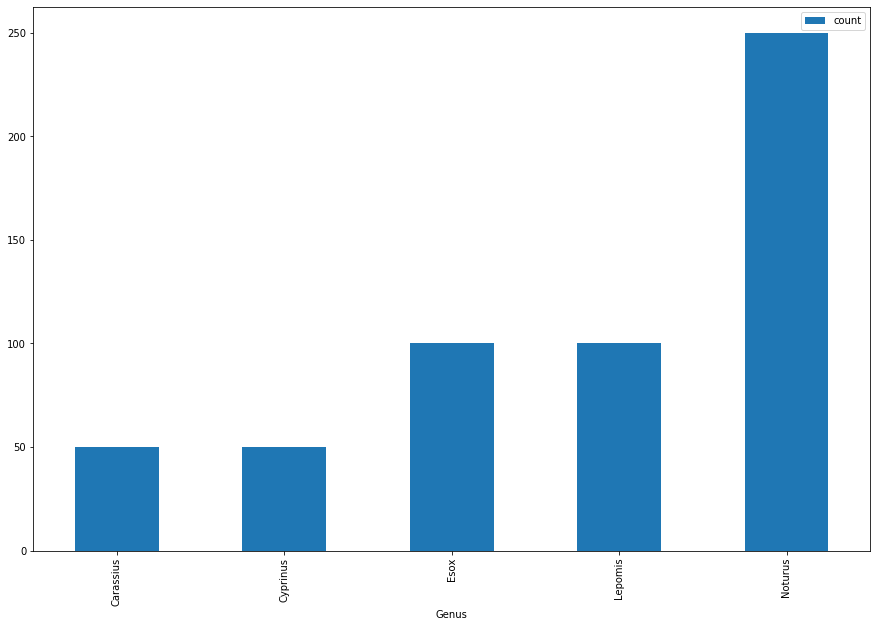

In [11]:
full_path = os.path.join(params["image_path"], suffix, "count_per_family_genis.csv")
family_genis_count_table = pd.read_csv(full_path).rename(columns={species_csv_fileName_header: "count"}).sort_values(by=['count'])
print(family_genis_count_table)
print(family_genis_count_table.groupby(species_csv_Family_header).agg('sum').sort_values(by=['count']))
family_genis_count_table.groupby(species_csv_Family_header).agg('sum').sort_values(by=['count']).plot.bar(rot=90, figsize=(15, 10))
plt.savefig(os.path.join(params["image_path"], suffix, 'count_per_family.pdf'))
family_genis_count_table.groupby(species_csv_Genus_header).agg('sum').sort_values(by=['count']).plot.bar(rot=90, figsize=(15, 10))
plt.savefig(os.path.join(params["image_path"], suffix, 'count_per_genis.pdf'))

Get count matrix

Genus               Carassius  Cyprinus  Esox  Lepomis  Noturus
scientificName                                                 
Carassius auratus          50         0     0        0        0
Cyprinus carpio             0        50     0        0        0
Esox americanus             0         0    50        0        0
Esox lucius                 0         0    50        0        0
Lepomis auritus             0         0     0       50        0
Lepomis cyanellus           0         0     0       50        0
Noturus eleutherus          0         0     0        0       50
Noturus exilis              0         0     0        0       50
Noturus flavus              0         0     0        0       50
Noturus gyrinus             0         0     0        0       50
Noturus insignis            0         0     0        0       50


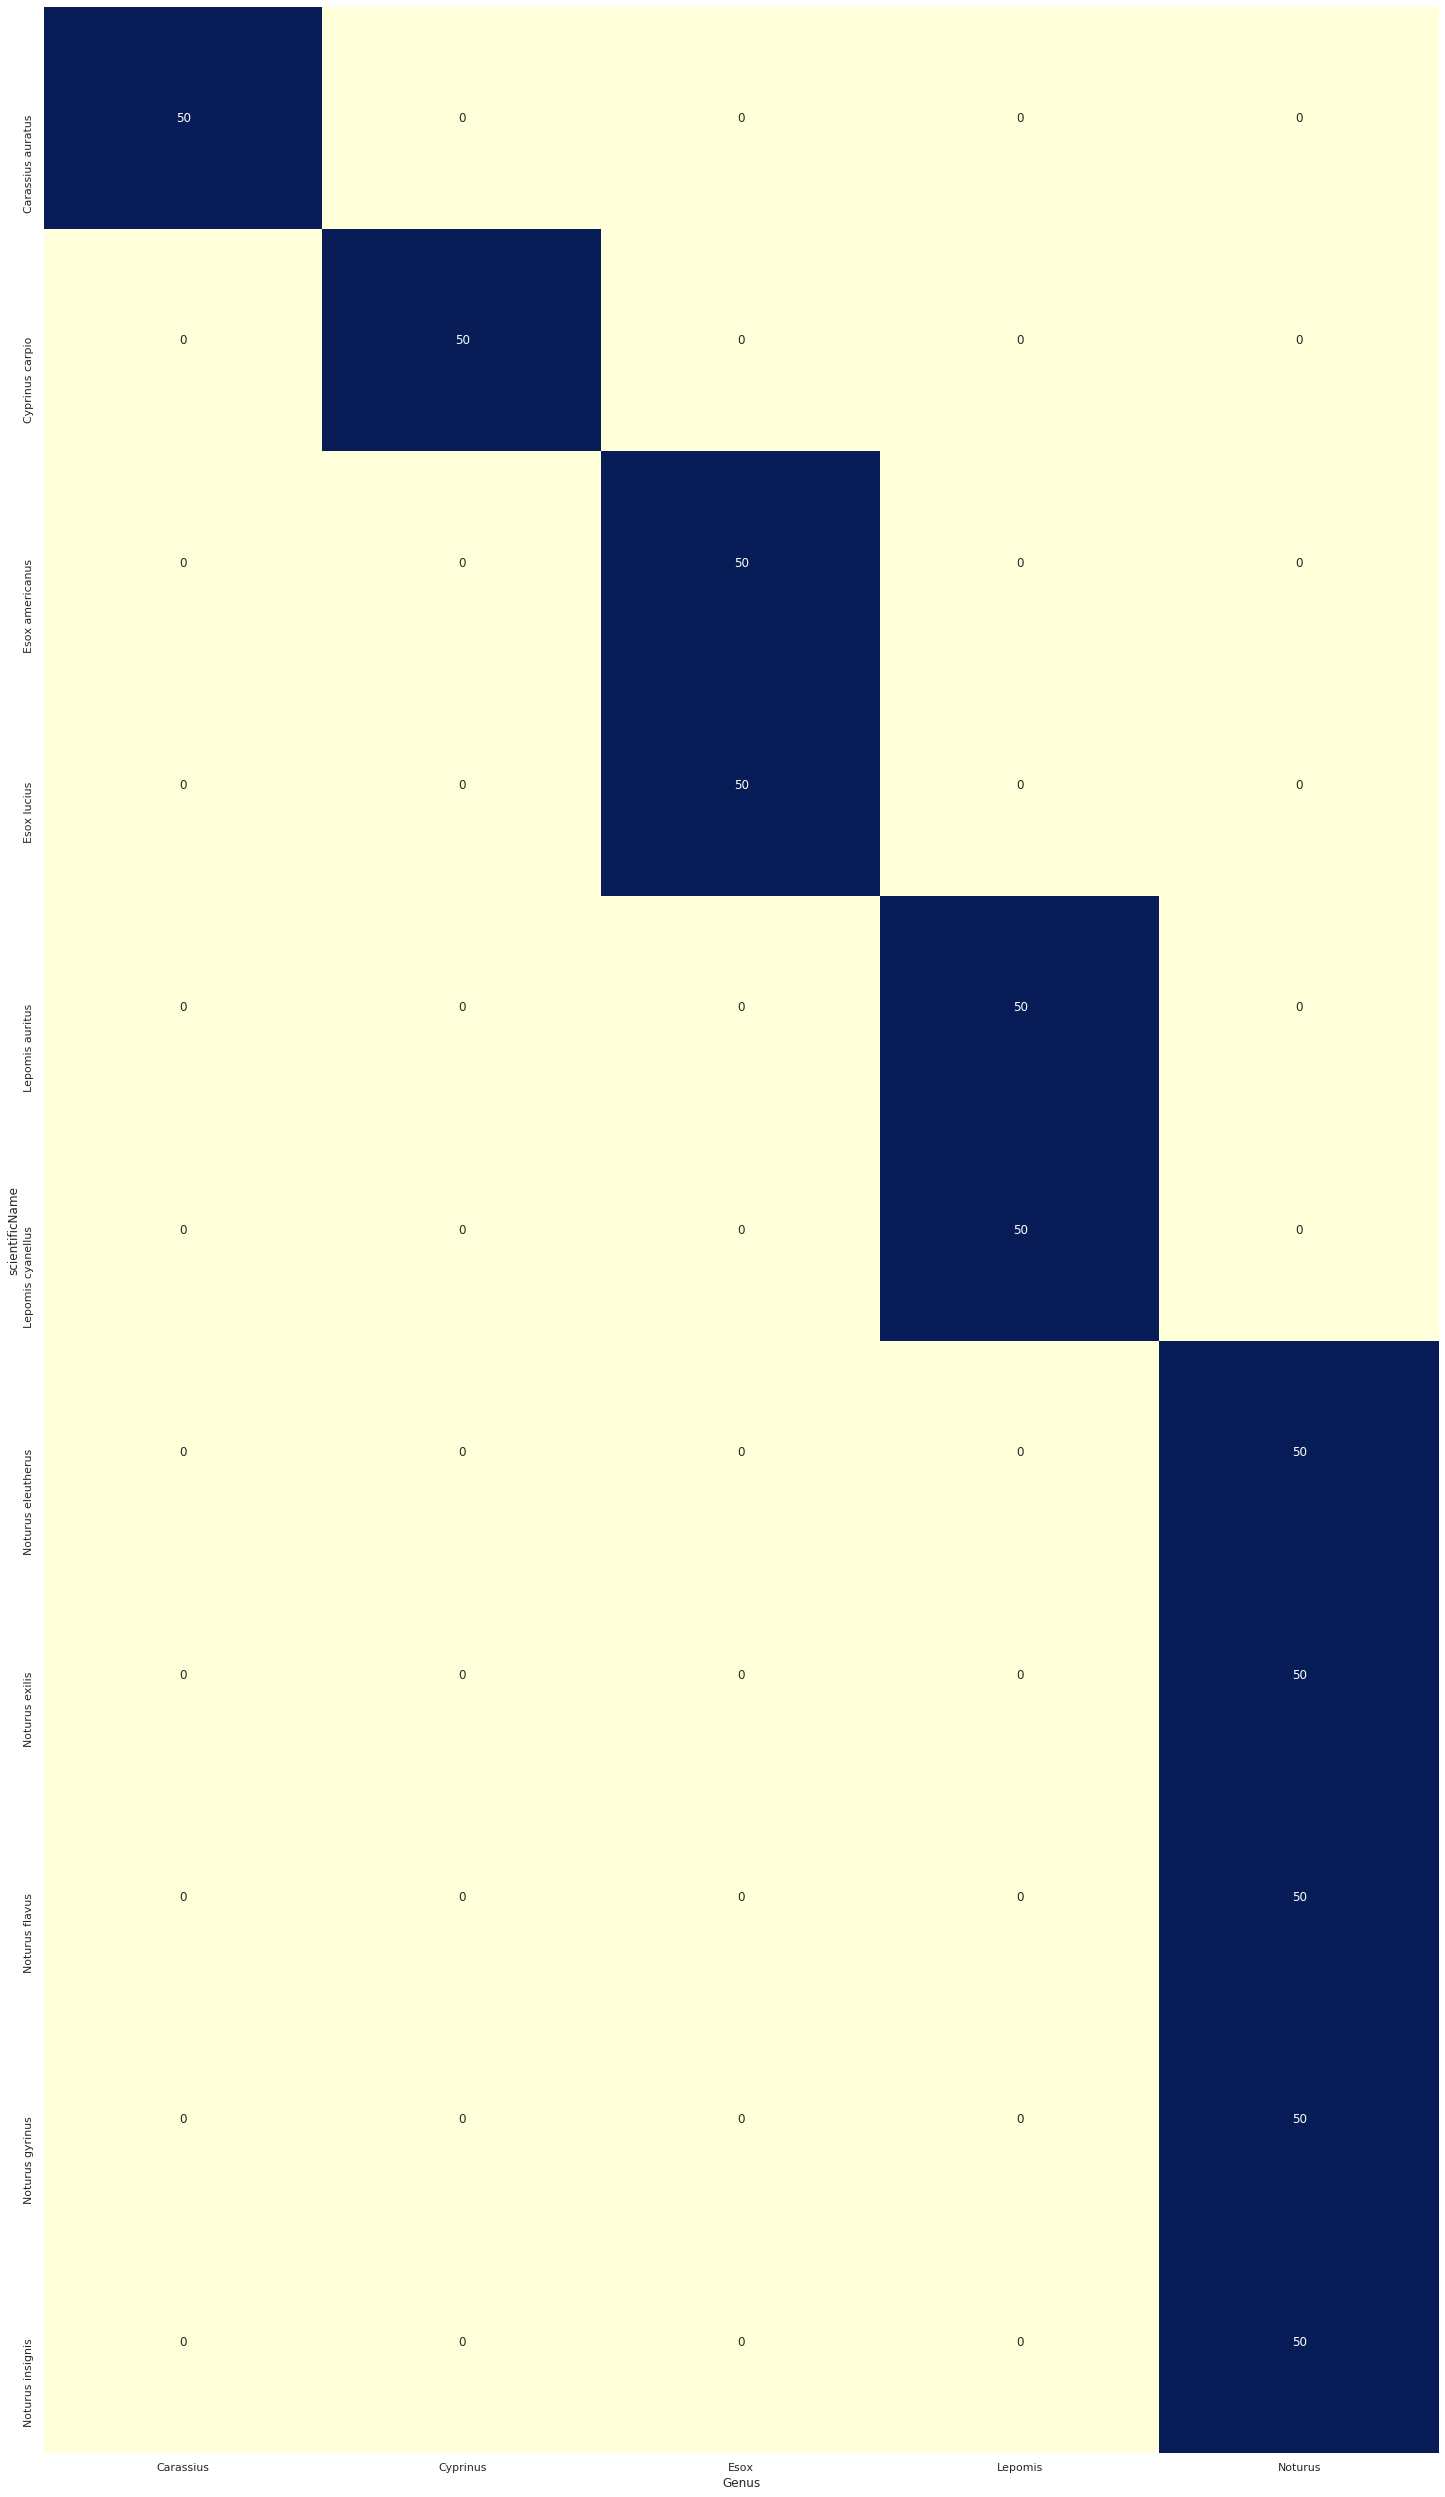

In [12]:
import numpy as np
import seaborn as sns; sns.set()

cleaned_metadata = pd.read_csv(os.path.join(params["image_path"], suffix, cleaned_species_csv_fileName), sep='\t')
species_genis_matrix = cleaned_metadata.groupby([species_csv_scientificName_header, species_csv_Genus_header]).size().unstack(fill_value=0)

print(species_genis_matrix)
fig, ax = plt.subplots(figsize=(25,45))
sns.heatmap(species_genis_matrix, annot=True, fmt="d", ax=ax, cmap="YlGnBu", cbar=False)
plt.savefig(os.path.join(params["image_path"], suffix , 'species_genis_matrix.pdf'))
species_genis_matrix.to_csv(os.path.join(params["image_path"], suffix, 'species_genis_matrix.csv'), sep='\t')

Get most frequent Genuses and clip them to a certain size

In [13]:
import os
list_of_sizes_of_interest=[50]
for size in list_of_sizes_of_interest:
    print("\nSpecies of sample size", size)
    
    sub_path = os.path.join(params["image_path"], str(size))
    if not os.path.exists(sub_path):
            os.makedirs(sub_path)
    # find species with image count more than a threshold
    genus_groupedby_species = cleaned_metadata.groupby([species_csv_Genus_header, species_csv_scientificName_header]).filter(lambda x: x[species_csv_fileName_header].count() >= size)
    genus_groupedby_species = genus_groupedby_species.groupby([species_csv_Genus_header, species_csv_scientificName_header]).agg(len).rename(columns={species_csv_fileName_header: "count"})['count']
    
    print(genus_groupedby_species)
    # get n top for each species
    species_list = genus_groupedby_species.reset_index()['scientificName'].unique()
    trimmed_cleaned_metadata = cleaned_metadata.loc[cleaned_metadata[species_csv_scientificName_header].isin(species_list)].groupby(species_csv_scientificName_header).head(size)
    print(trimmed_cleaned_metadata)
    trimmed_cleaned_metadata.to_csv(os.path.join(sub_path, cleaned_species_csv_fileName), sep="\t", index=False)
    




Species of sample size 50
Genus      scientificName    
Carassius  Carassius auratus     50
Cyprinus   Cyprinus carpio       50
Esox       Esox americanus       50
           Esox lucius           50
Lepomis    Lepomis auritus       50
           Lepomis cyanellus     50
Noturus    Noturus eleutherus    50
           Noturus exilis        50
           Noturus flavus        50
           Noturus gyrinus       50
           Noturus insignis      50
Name: count, dtype: int64
                fileName      scientificName     Genus         Family
0    INHS_FISH_59772.jpg   Lepomis cyanellus   Lepomis  Centrarchidae
1     INHS_FISH_4051.jpg     Noturus gyrinus   Noturus    Ictaluridae
2    INHS_FISH_38963.jpg     Esox americanus      Esox       Esocidae
3    INHS_FISH_30228.jpg   Lepomis cyanellus   Lepomis  Centrarchidae
4    INHS_FISH_18909.jpg     Cyprinus carpio  Cyprinus     Cyprinidae
..                   ...                 ...       ...            ...
545  INHS_FISH_26685.jpg  Notur

Get image size statistics

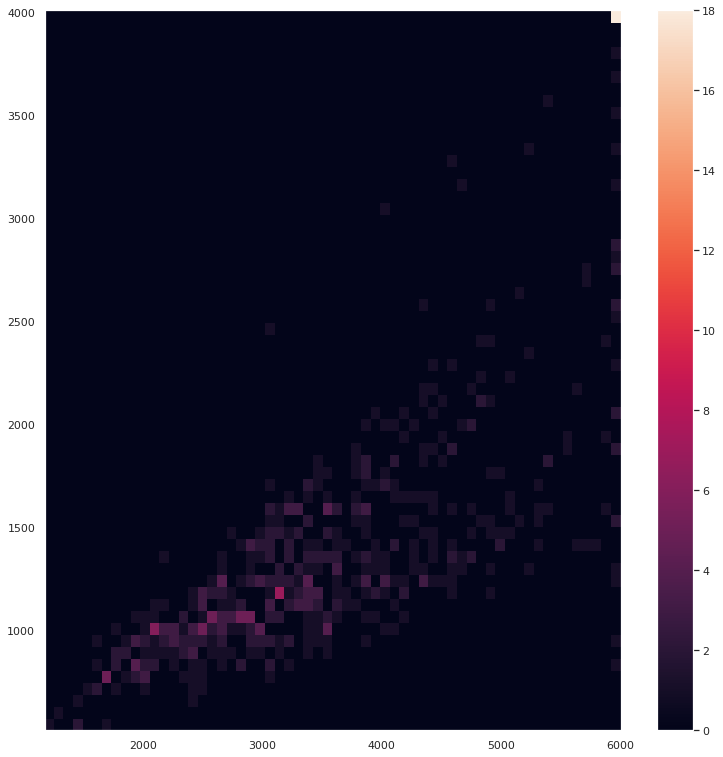

In [14]:
import PIL
from PIL import Image

# Get params
data_root = params["image_path"]
suffix = str(params["suffix"]) if ("suffix" in params and params["suffix"] is not None) else ""

# Get file
cleaned_species_csv_fileName_withsuffix = cleaned_species_csv_fileName
cleaned_species_csv_fileName_full_path = os.path.join(data_root, suffix, cleaned_species_csv_fileName_withsuffix)
cleaned_species_csv_file_exists = os.path.exists(cleaned_species_csv_fileName_full_path)
species_csv = pd.read_csv(cleaned_species_csv_fileName_full_path, delimiter='\t', index_col=species_csv_fileName_header, usecols=species_csv_usedColumns)
img_count = len(species_csv.index)

# Get image sizes
width=[]
height=[]
for indx, row in species_csv.iterrows(): 
    image = PIL.Image.open(os.path.join(data_root,image_subpath,indx))
    w, h = image.size
    width.append(w)
    height.append(h)

# plot histogram
plt.figure(figsize=(10, 10))
plt.hist2d(width, height, bins=60)
plt.subplots_adjust(bottom=0, top=1, left=0, right=1)
plt.colorbar()
plt.show()

Print images per species (visual verification)

['Carassius auratus', 'Lepomis cyanellus', 'Esox americanus', 'Cyprinus carpio', 'Noturus eleutherus', 'Esox lucius', 'Lepomis auritus', 'Noturus flavus', 'Noturus insignis', 'Noturus gyrinus', 'Noturus exilis']
Carassius auratus [38, 36, 238, 0, 460, 283, 17, 73]
Lepomis cyanellus [243, 98, 72, 305, 127, 282, 406, 113]
Esox americanus [288, 500, 291, 172, 455, 45, 517, 241]
Cyprinus carpio [264, 375, 295, 358, 206, 24, 12, 61]
Noturus eleutherus [542, 284, 493, 32, 407, 146, 148, 52]
Esox lucius [400, 296, 332, 150, 105, 342, 456, 156]
Lepomis auritus [115, 169, 163, 207, 474, 313, 424, 409]
Noturus flavus [132, 345, 396, 41, 294, 138, 549, 116]
Noturus insignis [344, 180, 285, 214, 137, 16, 123, 145]
Noturus gyrinus [506, 468, 437, 402, 340, 485, 380, 39]
Noturus exilis [495, 445, 458, 539, 178, 239, 293, 248]


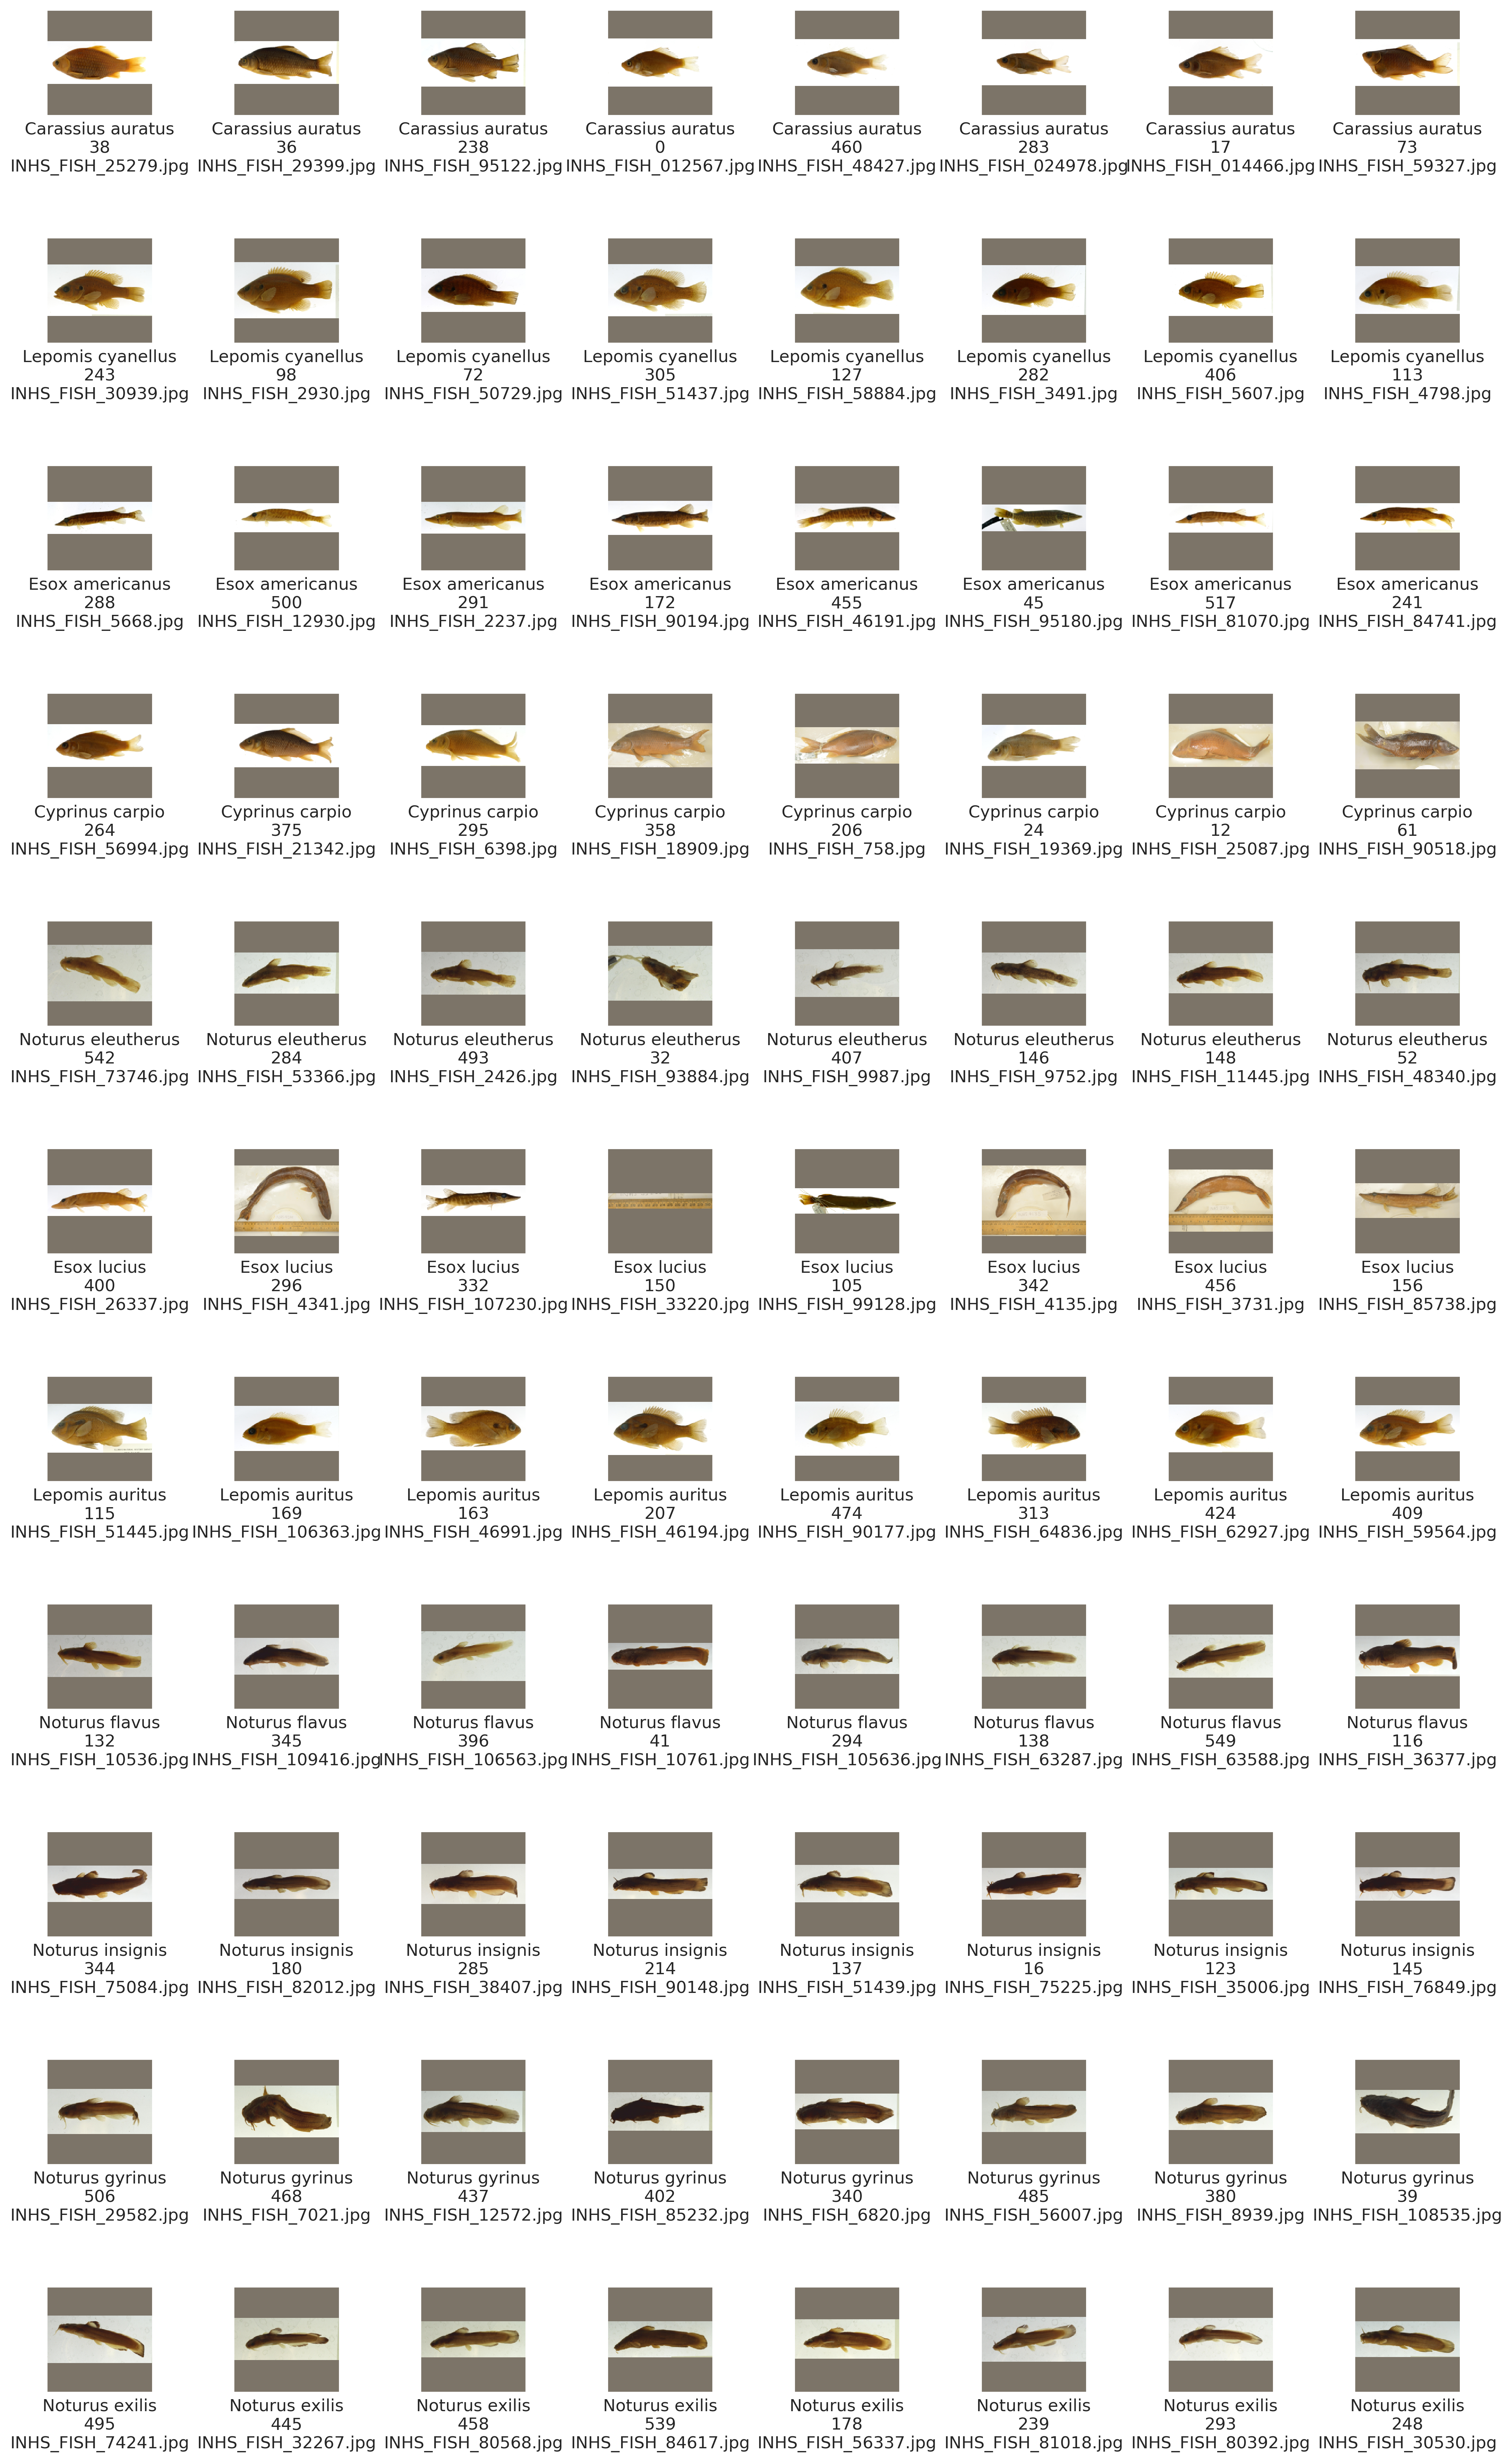

In [15]:
%matplotlib inline

import math
import random

# Parameters: show images of certain species
species_index = speciesList
num_species = len(species_index)
print(species_index)
limit_per_species = 8
number_per_row = 8

img_indexes = []
for i in species_index:
    randomList = random.sample(dataset.csv_processor.getSpeciesIndices(i), k=limit_per_species)
    print(i, randomList)
    img_indexes = img_indexes + randomList
img_count = len(img_indexes)

# Plot

n_rows = math.ceil(img_count/number_per_row)
fig, axes = plt.subplots(n_rows, number_per_row, figsize=(15, 2.5*n_rows), dpi= 300)


out_index = 0
in_index = 0
for i, ax in enumerate(axes.flat):
    if i < img_count and i < limit_per_species*num_species:
        
        augmentation, normalization = dataset.toggle_image_loading(augmentation=False, normalization=False)
        obj = dataset[img_indexes[i]]
        image = obj["image"].squeeze()
        dataset.toggle_image_loading(augmentation, normalization)
        
        speciesName = dataset.csv_processor.getSpeciesList()[(obj["species"])]
        ax.set_xlabel(speciesName + "\n" + str(img_indexes[i])+ "\n" + obj["fileName"])
        
        image = image.permute(1, 2, 0)
                
        ax.imshow(image.cpu().detach().numpy())
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        break
        
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

In [16]:
print(dataset.csv_processor.getSpeciesToGenusMatrix())

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])


In [20]:
species = dataset.csv_processor.getSpeciesList()[0]
genus = dataset.csv_processor.getGenusFromSpecies(species)
print('species', species, 'is from genus', genus)

species Carassius auratus is from genus Carassius


In [22]:
genus = dataset.csv_processor.getGenusList()[1]
species = dataset.csv_processor.getSpeciesWithinGenus(genus)
print('genus', genus, 'has species', str(species))

genus Lepomis has species ['Lepomis cyanellus', 'Lepomis auritus']


In [26]:
species = dataset.csv_processor.getSpeciesList()[2]
dataset.csv_processor.getNumberOfImagesForSpecies(species)

50